<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Lesson_12_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import skimage
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from skimage.metrics import structural_similarity as ssim

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
filePath = '/content/drive/My Drive/ML/clust.jpg'
img = cv2.imread(filePath) #"https://drive.google.com/file/d/1rhNW1z4nmvdv5hFnLGsANCk7M8H5okdy/view?usp=sharing")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

w, h, _ = img.shape
img = cv2.resize(img, (int(h/5), int(w/5)))


In [121]:
def draw_picture(image, title):
  plt.figure(figsize=(4, 3))
  plt.axis('off')
  plt.imshow(image)
  plt.title(title)
  plt.show()

def draw_picturs_row(images):
  fig, axz = plt.subplots(1, len(images), figsize=(15, 3))
  #fig.figure(figsize=(15, 3))
  cnt = 0
  for img in images:
    axi = axz[cnt]
    #axi.figure(figsize=(4, 3))
    axi.imshow(img[0])
    axi.set_title(img[1])
    cnt += 1
  plt.show()

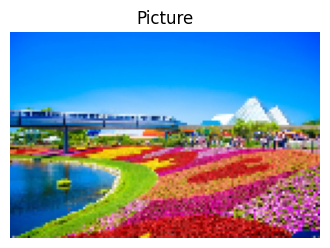

In [19]:
draw_picture(img, 'Picture')

In [125]:
def try_KMeans(img, n_clusters):
  vectorized = img.reshape((-1,3))
  kmn = KMeans(n_clusters=n_clusters, random_state=42)
  clusters = kmn.fit_predict(vectorized)
  palette = np.array(kmn.cluster_centers_).astype(int)

  w, h, _ = img.shape
  recolored_img = np.copy(vectorized)
  for index in range(len(vectorized)):
      recolored_img[index] = palette[clusters[index]]
  w, h, _ = img.shape
  recolored_img = recolored_img.reshape(w,h,3)
  ssm_val = ssim(img, recolored_img, channel_axis=2)
  return recolored_img, f"n_clusters={n_clusters}, ssim={ssm_val:1.2f}"

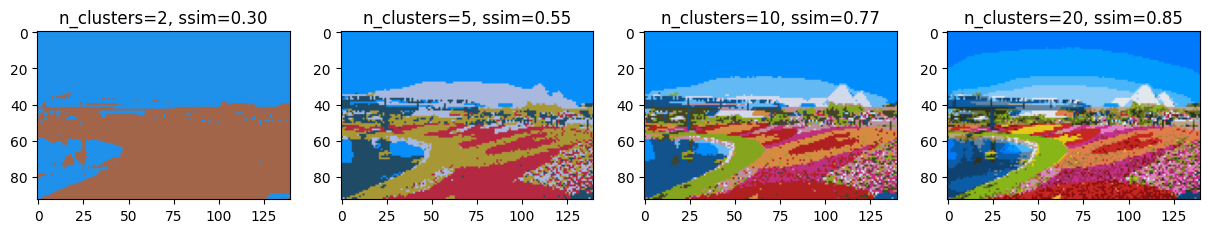

In [126]:
imgs = []
for ncl in [2, 5, 10, 20]:
  imgs.append(try_KMeans(img, ncl))

draw_picturs_row(imgs)

In [127]:
def try_AgglomerativeClustering(img, n_clusters):
  vectorized = img.reshape((-1,3))
  aggc = AgglomerativeClustering(n_clusters=n_clusters)
  clusters = aggc.fit_predict(vectorized)
  palette = []
  for cn in range(n_clusters):
    mask = list(map(lambda c: c == cn, clusters))
    avg_color = np.average(vectorized[mask], axis=0).astype(int)
    palette.append(avg_color)

  w, h, _ = img.shape
  recolored_img = np.copy(vectorized)
  for index in range(len(vectorized)):
      recolored_img[index] = palette[clusters[index]]
  w, h, _ = img.shape
  recolored_img = recolored_img.reshape(w,h,3)
  ssm_val = ssim(img, recolored_img, channel_axis=2)
  return recolored_img, f"n_clusters={n_clusters}, ssim={ssm_val:1.2f}"


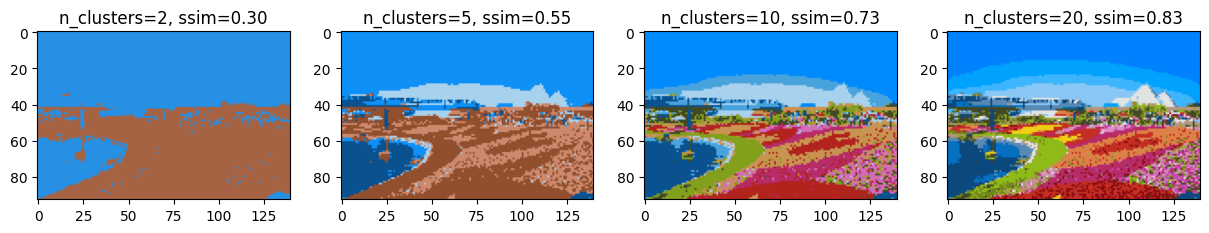

In [128]:
imgs = []
for ncl in [2, 5, 10, 20]:
  imgs.append(try_AgglomerativeClustering(img, ncl))

draw_picturs_row(imgs)

In [83]:
def try_DBScan(img, eps):
  vectorized = img.reshape((-1,3))
  dbs = DBSCAN(eps=eps, min_samples=50, metric = 'euclidean',algorithm ='auto') # , eps=eps
  clusters = dbs.fit_predict(vectorized)
  palette = []
  for cn in np.unique(clusters):
    mask = list(map(lambda c: c == cn, clusters))
    avg_color = np.average(vectorized[mask], axis=0).astype(int)
    palette.append(avg_color)

  w, h, _ = img.shape
  recolored_img = np.copy(vectorized)
  for index in range(len(vectorized)):
      recolored_img[index] = palette[clusters[index]]
  recolored_img = recolored_img.reshape(w,h,3)
  ssm_val = ssim(img, recolored_img, channel_axis=2)
  print(f"ssim={ssm_val}")
  draw_picture(recolored_img, 'Picture')

ssim=0.17824509441365963


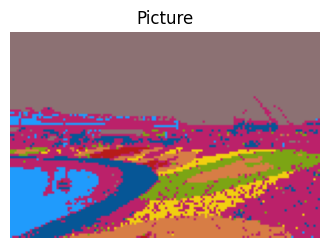

In [91]:
try_DBScan(img, 18)



Выводы:
лучший результат показала модель KMeans с наибольшим количеством кластеров